In [2]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [46]:
# Setup the figures
execfile('../code/figure-setup.py')

In [5]:
# Upload the fitting results for each model
bat_casey = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/casey_bayes_results/beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior.csv', index_col=0)
bat_casey_undetected = pd.read_csv(casey_dir+'beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior_undetected.csv', index_col=0)

bat_decompir = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_mle.csv', index_col=0)
bat_decompir_uncertain = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_uncertainties.csv', index_col=0)
bat_decompir = bat_decompir.join(bat_decompir_uncertain)
bat_decompir_undetected = pd.read_csv(sed_fit_dir+'analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_undetected.csv', index_col=0)

bat_dale14 = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/dale14_results/final_fit_results_dale14.csv', index_col=0)
bat_dale14_undetected = pd.read_csv(sed_fit_dir+'analysis/dale14_results/final_fit_results_dale14_undetected.csv', index_col=0)

# Remove 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622', 'Mrk3'])
bat_casey = bat_casey.drop(bad_sources)
bat_decompir = bat_decompir.drop(bad_sources)
bat_dale14 = bat_dale14.drop(bad_sources)

# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

In [44]:
# Combine the total IR luminosities into one DataFrame
bat_lir = pd.DataFrame(index=bat_info.index)
bat_lir['LIRC12'] = bat_casey['lir_total']
bat_lir['LIRDecompIR'] = bat_decompir['lir_total']
bat_lir['LIRDale14'] = bat_dale14['lir_total']

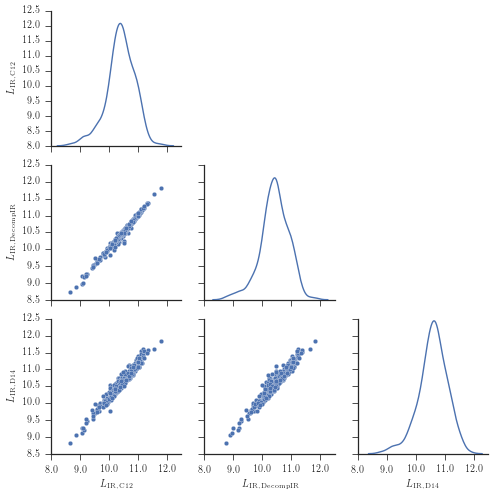

In [48]:
# Plot the correlation between each LIR using seaborn's pairplot method
g = sn.pairplot(bat_lir, diag_kind="kde", size=textwidth/3., aspect=1.)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

for i,ax in enumerate(g.axes[-1,:]):
    if i == 0:
        ax.xaxis.set_label_text(r'$L_{\rm IR,\,C12}$')
    elif i == 1:
        ax.xaxis.set_label_text(r'$L_{\rm IR,\,DecompIR}$')
    elif i == 2:
        ax.xaxis.set_label_text(r'$L_{\rm IR,\,D14}$')
    ax.xaxis.set_ticks([8.0, 9.0, 10.0, 11.0, 12.0])
    ax.xaxis.set_ticklabels(['8.0', '9.0', '10.0', '11.0', '12.0'])

for i,ax in enumerate(g.axes[:,0]):
    if i == 0:
        ax.yaxis.set_label_text(r'$L_{\rm IR,\,C12}$')
    elif i == 1:
        ax.yaxis.set_label_text(r'$L_{\rm IR,\,DecompIR}$')
    elif i == 2:
        ax.yaxis.set_label_text(r'$L_{\rm IR,\,D14}$')
#        if j == 0:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,C12}$')          
#        if j == 1:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,DecompIR}$')
#        if j == 2:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,D14}$')
g.fig.savefig(figsave_dir+'lir_total-comparison.pdf', bbox_inches='tight')

Notes:
Need to change the axis labels [DONE]
Need to adjust the line-width and marker sizes [no need to]
Need to adjust tick labels especially for x-axis [DONE]

In [20]:
# Analysis
bat_lir['LIR_C12'].describe()

count    271.000000
mean      10.402006
std        0.485378
min        8.654362
25%       10.154984
50%       10.425518
75%       10.734533
max       11.783195
Name: LIR_C12, dtype: float64

In [22]:
bat_lir['LIR_DecompIR'].describe()

count    271.000000
mean      10.425592
std        0.487928
min        8.730080
25%       10.171906
50%       10.438552
75%       10.748242
max       11.825043
Name: LIR_DecompIR, dtype: float64

In [24]:
bat_lir['LIR_Dale14'].describe()

count    271.000000
mean      10.599746
std        0.495589
min        8.812794
25%       10.342424
50%       10.631189
75%       10.921675
max       11.856718
Name: LIR_Dale14, dtype: float64

In [27]:
(bat_lir['LIR_C12'] - bat_lir['LIR_DecompIR']).describe()

count    271.000000
mean      -0.023586
std        0.059914
min       -0.213494
25%       -0.055700
50%       -0.031740
75%       -0.006153
max        0.332908
dtype: float64

In [29]:
(bat_lir['LIR_Dale14'] - bat_lir['LIR_C12']).describe()

count    271.000000
mean       0.197740
std        0.110556
min       -0.267834
25%        0.101222
50%        0.195409
75%        0.265840
max        0.492619
dtype: float64

In [30]:
(bat_lir['LIR_Dale14'] - bat_lir['LIR_DecompIR']).describe()

count    271.000000
mean       0.174154
std        0.129322
min       -0.066564
25%        0.067180
50%        0.165539
75%        0.255219
max        0.650936
dtype: float64